In [1]:
# Module Importations
from collections import Counter
import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

# Print versioning information
print('seaborn version =', sns.__version__)
print('numpy version =', np.__version__)  
print('pandas version =', pd.__version__)

seaborn version = 0.10.0
numpy version = 1.19.4
pandas version = 1.1.4


In [2]:
# Custom Module Importations
from Source.data import load_data
from Source.features import data_munging
from Source.visualisation import figures_helper

In [3]:
# Constants
SAVE_FIGURES = False
REGENERATE_DATASETS = False

In [4]:
# Load each dataset
df_plant1_gen = load_data.load_data('Plant_1_Generation_Data.csv')
df_plant1_weather = load_data.load_data('Plant_1_Weather_Sensor_Data.csv')
df_plant2_gen = load_data.load_data('Plant_2_Generation_Data.csv')
df_plant2_weather = load_data.load_data('Plant_2_Weather_Sensor_Data.csv')

# Summary Statistics for Raw Data

In [5]:
# Plant 1 Generation Summary
print(df_plant1_gen.info(), "\n")
print("Stats:", "\n", df_plant1_gen.describe().T, "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None 

Stats: 
                count          mean            std        min           25%  \
PLANT_ID     68778.0  4.135001e+06       0.000000  4135001.0  4.135001e+06   
DC_POWER     68778.0  3.147426e+03    4036.457169        0.0  0.000000e+00   
AC_POWER     68778.0  3.078028e+02     394.396439        0.0  0.000000e+00   
DAILY_YIELD  68778.0  3.295969e+03    3145.178309        0.0  0.000000e+00   
TOTAL_YIELD  68778.0  6.978712e+06  416271.982

In [6]:
# Plant 1 Weather Summary
print(df_plant1_weather.info(), "\n")
print("Stats:", "\n", df_plant1_weather.describe().T, "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
None 

Stats: 
                       count          mean        std           min  \
PLANT_ID             3182.0  4.135001e+06   0.000000  4.135001e+06   
AMBIENT_TEMPERATURE  3182.0  2.553161e+01   3.354856  2.039850e+01   
MODULE_TEMPERATURE   3182.0  3.109102e+01  12.261222  1.814042e+01   
IRRADIATION          3182.0  2.283128e-01   0.300836  0.000000e+00   

                              25%           50%           75%  

In [7]:
# Plant 2 Generation Summary
print(df_plant2_gen.info(), "\n")
print("Stats:", "\n", df_plant2_gen.describe().T, "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB
None 

Stats: 
                count          mean           std        min           25%  \
PLANT_ID     67698.0  4.136001e+06  0.000000e+00  4136001.0  4.136001e+06   
DC_POWER     67698.0  2.467020e+02  3.705696e+02        0.0  0.000000e+00   
AC_POWER     67698.0  2.412778e+02  3.621121e+02        0.0  0.000000e+00   
DAILY_YIELD  67698.0  3.294890e+03  2.919448e+03        0.0  2.727500e+02   
TOTAL_YIELD  67698.0  6.589448e+08  7.296678e+08   

In [8]:
# Plant 2 Weather Summary
print(df_plant2_weather.info(), "\n")
print("Stats:", "\n", df_plant2_weather.describe().T, "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB
None 

Stats: 
                       count          mean        std           min  \
PLANT_ID             3259.0  4.136001e+06   0.000000  4.136001e+06   
AMBIENT_TEMPERATURE  3259.0  2.806940e+01   4.061556  2.094238e+01   
MODULE_TEMPERATURE   3259.0  3.277241e+01  11.344034  2.026512e+01   
IRRADIATION          3259.0  2.327370e-01   0.312693  0.000000e+00   

                              25%           50%           75%  

In [9]:
# Check for NaN
df_plant1_weather.isnull().values.any()

False

In [10]:
# Review unique values for keys
for df in [df_plant1_gen, df_plant1_weather, df_plant2_gen, df_plant2_weather]:
    print(df.SOURCE_KEY.unique(), "\n")

['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE'] 

['HmiyD2TTLFNqkNe'] 

['4UPUqMRk7TRMgml' '81aHJ1q11NBPMrL' '9kRcWv60rDACzjR' 'Et9kgGMDl729KT4'
 'IQ2d7wF4YD8zU1Q' 'LYwnQax7tkwH5Cb' 'LlT2YUhhzqhg5Sw' 'Mx2yZCDsyf6DPfv'
 'NgDl19wMapZy17u' 'PeE6FRyGXUgsRhN' 'Qf4GUc1pJu5T6c6' 'Quc1TzYxW2pYoWX'
 'V94E5Ben1TlhnDV' 'WcxssY2VbP4hApt' 'mqwcsP2rE7J0TFp' 'oZ35aAeoifZaQzV'
 'oZZkBaNadn6DNKz' 'q49J1IKaHRwDQnt' 'rrq4fwE8jgrTyWY' 'vOuJvMaM2sgwLmb'
 'xMbIugepa2P7lBB' 'xoJJ8DcxJEcupym'] 

['iq8k7ZNt4Mwm3w0'] 



# Data Munging

Adding datetimes

In [11]:
# Data Munging - Adding DateTime column

# Plant 1 Generation
df_plant1_gen['DATE_TIME'] = df_plant1_gen.apply(lambda row: data_munging.return_datetime('generation', 1, row['DATE_TIME']), axis = 1)

# Plant 1 Weather
df_plant1_weather['DATE_TIME'] = df_plant1_weather.apply(lambda row: data_munging.return_datetime('weather', 1, row['DATE_TIME']), axis = 1)

# Plant 2 Generation
df_plant2_gen['DATE_TIME'] = df_plant2_gen.apply(lambda row: data_munging.return_datetime('generation', 2, row['DATE_TIME']), axis = 1)

# Plant 2 Weather
df_plant2_weather['DATE_TIME'] = df_plant2_weather.apply(lambda row: data_munging.return_datetime('weather', 2, row['DATE_TIME']), axis = 1)

In [12]:
# Confirm Datetime Cast Success
for df in [df_plant1_gen, df_plant1_weather, df_plant2_gen, df_plant2_weather]:
    print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           318

In [13]:
# Check for missing timestamps in data
for df in [df_plant1_gen, df_plant1_weather, df_plant2_gen, df_plant2_weather]:
    print(Counter(df.SOURCE_KEY), "\n")

Counter({'bvBOhCH3iADSZry': 3155, '1BY6WEcLGh8j5v7': 3154, '7JYdWkrLSPkdwr4': 3133, 'VHMLBKoKgIrUVDU': 3133, 'ZnxXDlPa8U1GXgE': 3130, 'ih0vzX44oOqAx2f': 3130, 'wCURE6d3bPkepu2': 3126, 'z9Y9gH1T5YWrNuG': 3126, 'iCRJl6heRkivqQ3': 3125, 'pkci93gMrogZuBj': 3125, 'uHbuxQJl8lW7ozc': 3125, 'McdE0feGgRqW7Ca': 3124, 'rGa61gmuvPhdLxV': 3124, 'sjndEbLyjtCKgGv': 3124, 'zVJPv84UY57bAof': 3124, 'ZoEaEvLYb1n2sOq': 3123, '1IF53ai7Xc0U56Y': 3119, 'adLQvlD726eNBSB': 3119, 'zBIq5rxdHJRwDNY': 3119, '3PZuoBAID5Wc2HD': 3118, 'WRmjgnKYAwPKWDb': 3118, 'YxYtjZvoooNbGkE': 3104}) 

Counter({'HmiyD2TTLFNqkNe': 3182}) 

Counter({'81aHJ1q11NBPMrL': 3259, '9kRcWv60rDACzjR': 3259, 'LYwnQax7tkwH5Cb': 3259, 'LlT2YUhhzqhg5Sw': 3259, 'PeE6FRyGXUgsRhN': 3259, 'V94E5Ben1TlhnDV': 3259, 'WcxssY2VbP4hApt': 3259, 'oZZkBaNadn6DNKz': 3259, 'q49J1IKaHRwDQnt': 3259, 'rrq4fwE8jgrTyWY': 3259, 'vOuJvMaM2sgwLmb': 3259, 'xoJJ8DcxJEcupym': 3259, '4UPUqMRk7TRMgml': 3195, 'Et9kgGMDl729KT4': 3195, 'Mx2yZCDsyf6DPfv': 3195, 'Qf4GUc1pJu5T6c6'

In [14]:
# Determine start/end dates for all datasets
print(df_plant1_gen.DATE_TIME.min())
print(df_plant1_gen.DATE_TIME.max())

print(df_plant1_weather.DATE_TIME.min())
print(df_plant1_weather.DATE_TIME.max())

print(df_plant2_gen.DATE_TIME.min())
print(df_plant2_gen.DATE_TIME.max())

print(df_plant2_weather.DATE_TIME.min())
print(df_plant2_weather.DATE_TIME.max())

2020-05-15 00:00:00
2020-06-17 23:45:00
2020-05-15 00:00:00
2020-06-17 23:45:00
2020-05-15 00:00:00
2020-06-17 23:45:00
2020-05-15 00:00:00
2020-06-17 23:45:00


# Data Munging

Combining weather and generation datasets

In [15]:
# Combine Generation & Weather Data for Plant 1
if REGENERATE_DATASETS == True:
    df_plant1_combined = data_munging.combine_generation_weather_dataframes(df_plant1_gen, df_plant1_weather)
    
    print(df_plant1_combined)

In [16]:
# Combine Generation & Weather Data for Plant 2
if REGENERATE_DATASETS == True:
    df_plant2_combined = data_munging.combine_generation_weather_dataframes(df_plant2_gen, df_plant2_weather)

    print(df_plant2_combined)

In [17]:
# Save combined datasets

# Name datasets
if REGENERATE_DATASETS == True:
    df_plant1_combined.name = "df_plant1_combined"
    df_plant2_combined.name = "df_plant2_combined"

    datasets = [df_plant1_combined, df_plant2_combined]

    for dataset in datasets:
        load_data.pickle_data(dataset, dataset.name)

In [18]:
# Reload saved datasets
df_plant1_combined = load_data.load_pickled_data("df_plant1_combined.pkl")
df_plant2_combined = load_data.load_pickled_data("df_plant2_combined.pkl")

Loading pickled dataframe started ...
Loading pickled dataframe complete ...
Loading pickled dataframe started ...
Loading pickled dataframe complete ...


In [19]:
# Data Munging - Add Time of Day Column

if REGENERATE_DATASETS == True:

    for df in [df_plant1_combined, df_plant2_combined]:
        df['DATE'] = df['DATE_TIME'].dt.date
        df['TIME_OF_DAY'] = df_plant1_combined.apply(lambda row: data_munging.return_time_of_day(row['DATE_TIME']), axis = 1)
        df['HOUR'] = df['DATE_TIME'].dt.hour
        df['DAY'] = df['DATE_TIME'].dt.day
        df['WEEKDAY'] = df['DATE_TIME'].dt.day_name()
        df['MONTH'] = df['DATE_TIME'].dt.month
        df['YEAR'] = df['DATE_TIME'].dt.year

In [20]:
# Sort datasets by date
if REGENERATE_DATASETS == True:
    df_plant1_combined.sort_values(by = 'DATE_TIME')
    df_plant2_combined.sort_values(by = 'DATE_TIME')

In [21]:
# Save modified datasets
if REGENERATE_DATASETS == True:
    df_plant1_combined.name = "df_plant1_combined"
    df_plant2_combined.name = "df_plant2_combined"

    datasets = [df_plant1_combined, df_plant2_combined]

    for dataset in datasets:
        load_data.pickle_data(dataset, dataset.name)

In [22]:
# Load modified datasets
df_plant1_combined = load_data.load_pickled_data("df_plant1_combined.pkl")
df_plant2_combined = load_data.load_pickled_data("df_plant2_combined.pkl")

# Name datasets
df_plant1_combined.name = "Plant1"
df_plant2_combined.name = "Plant2"

print(df_plant1_combined)
print(df_plant2_combined)

Loading pickled dataframe started ...
Loading pickled dataframe complete ...
Loading pickled dataframe started ...
Loading pickled dataframe complete ...
                DATE_TIME PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00  4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00  4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00  4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00  4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00  4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...      ...              ...       ...       ...   
71803 2020-06-17 23:45:00  4135001  wCURE6d3bPkepu2       0.0       0.0   
71804 2020-06-17 23:45:00  4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
71805 2020-06-17 23:45:00  4135001  zBIq5rxdHJRwDNY       0.0       0.0   
71806 2020-06-17 23:45:00  4135001  zVJPv84UY57bAof       0.0       0.0   
71807 2020-06-17 23:4

# Data Munging

Handling missing values

In [23]:
# Inspect dfs for missing values
print("Plant1:", "\n", df_plant1_combined.isna().sum())
print("Plant2:", "\n", df_plant2_combined.isna().sum())

Plant1: 
 DATE_TIME         0
PLANT_ID          0
SOURCE_KEY        0
DC_POWER       3030
AC_POWER       3030
DAILY_YIELD    3030
TOTAL_YIELD    3030
AMB_TEMP       1804
MOD_TEMP       1804
IRRADIATION    1804
DATE              0
TIME_OF_DAY       0
HOUR              0
DAY               0
WEEKDAY           0
MONTH             0
YEAR              0
dtype: int64
Plant2: 
 DATE_TIME         0
PLANT_ID          0
SOURCE_KEY        0
DC_POWER       4110
AC_POWER       4110
DAILY_YIELD    4110
TOTAL_YIELD    4110
AMB_TEMP        110
MOD_TEMP        110
IRRADIATION     110
DATE              0
TIME_OF_DAY       0
HOUR              0
DAY               0
WEEKDAY           0
MONTH             0
YEAR              0
dtype: int64


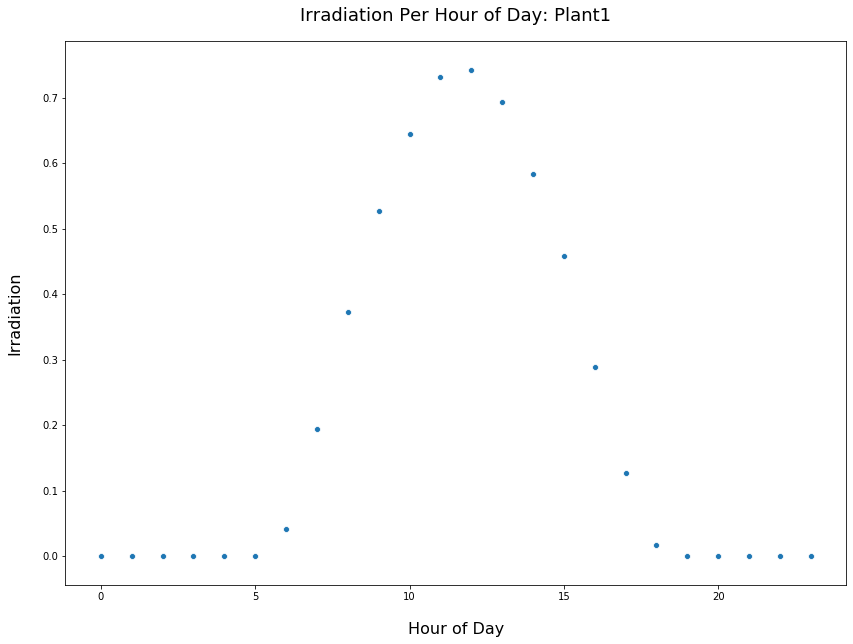

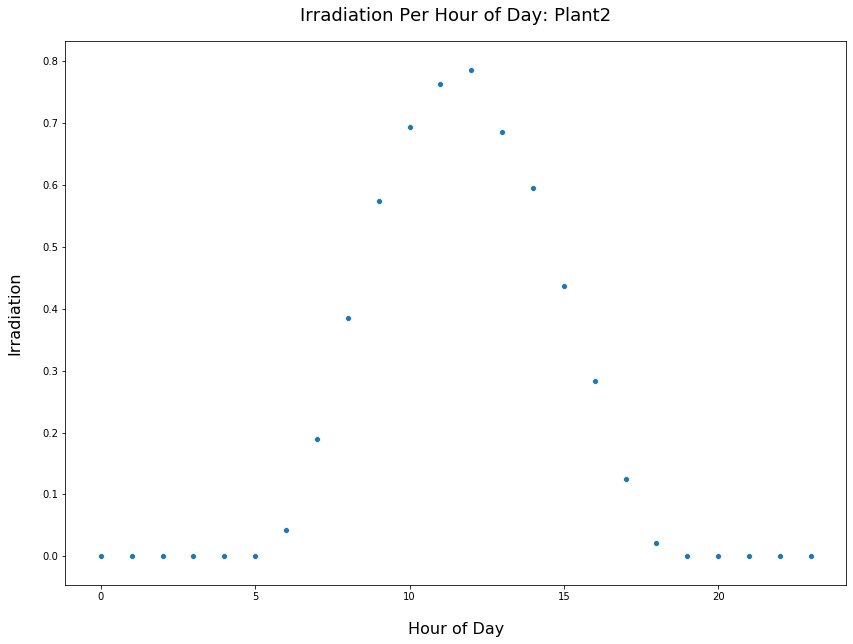

In [24]:
# To fill in missing values - Evaluate sunrise-sunset times [Result = 0500 : 1900]

for dataset in [df_plant1_combined, df_plant2_combined]:

    profile_group = dataset.groupby(['HOUR']).mean().reset_index()

    fig, axes = plt.subplots(figsize = (14, 10))

    # Populate each subplot
    sns.scatterplot(data = profile_group, x = 'HOUR', y = 'IRRADIATION', ax = axes)

    # Set title, axes
    plt.title(f"Irradiation Per Hour of Day: {dataset.name}", fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
    plt.xlabel("Hour of Day", fontsize = 16, labelpad = 20)
    plt.ylabel("Irradiation", fontsize = 16, labelpad = 20)

    # Save figure

    plt.show()

In [25]:
# Fill in missing values for DC Power
for dataset in [df_plant1_combined, df_plant2_combined]:

    # Fill in zero-generation hours (ie. darkness) DC generation
    dataset.loc[(dataset['DC_POWER'].isna()) & ((dataset['HOUR'] < 5) | (dataset['HOUR'] > 18)), 'DC_POWER'] = 0

    # Interpolate remaining missing DC values
    dataset['DC_POWER'].interpolate(method = 'linear', axis = 0, inplace = True)

In [26]:
# Fill in missing values for AC Power
for dataset in [df_plant1_combined, df_plant2_combined]:

    # Fill in zero-generation hours (ie. darkness) AC generation
    dataset.loc[(dataset['AC_POWER'].isna()) & ((dataset['HOUR'] < 5) | (dataset['HOUR'] > 18)), 'AC_POWER'] = 0

    # Interpolate remaining missing AC values
    dataset['AC_POWER'].interpolate(method = 'linear', axis = 0, inplace = True) 

In [27]:
# Fill in missing values for Daily Yield
for dataset in [df_plant1_combined, df_plant2_combined]:

    # Fill in zero-generation morning hours (ie. darkness) yield
    dataset.loc[(dataset['DAILY_YIELD'].isna()) & (dataset['HOUR'] < 5), 'DAILY_YIELD'] = 0
    
    # Interpolate remaining missing values
    dataset.sort_values(['SOURCE_KEY','DATE_TIME'], ascending = True, inplace = True)
    dataset['DAILY_YIELD'].interpolate(method = 'linear', axis = 0, inplace = True)

In [28]:
# Fill in missing values for Total Yield
for dataset in [df_plant1_combined, df_plant2_combined]:

    # If there are still any missing values, fill with most recent value
    dataset.sort_values(['SOURCE_KEY','DATE_TIME'], ascending = True, inplace = True)
    
    dataset['TOTAL_YIELD'].fillna(method = 'ffill', inplace = True)

In [29]:
# Fill in missing values for Amb Temp
for dataset in [df_plant1_combined, df_plant2_combined]:

    # Interpolate remaining missing values
    dataset['AMB_TEMP'].interpolate(method = 'linear', axis = 0, inplace = True)

In [30]:
# Fill in missing values for Mod Temp
for dataset in [df_plant1_combined, df_plant2_combined]:

    # Interpolate remaining missing values
    dataset['MOD_TEMP'].interpolate(method = 'linear', axis = 0, inplace = True)

In [31]:
# Fill in missing values for Irradiation
for dataset in [df_plant1_combined, df_plant2_combined]:

    # Interpolate remaining missing values
    dataset['IRRADIATION'].interpolate(method = 'linear', axis = 0, inplace = True)

In [32]:
# Check for Nan after corrections
print("Plant1:", "\n", df_plant1_combined.isna().sum())
print("Plant2:", "\n", df_plant2_combined.isna().sum())

Plant1: 
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
AMB_TEMP       0
MOD_TEMP       0
IRRADIATION    0
DATE           0
TIME_OF_DAY    0
HOUR           0
DAY            0
WEEKDAY        0
MONTH          0
YEAR           0
dtype: int64
Plant2: 
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
AMB_TEMP       0
MOD_TEMP       0
IRRADIATION    0
DATE           0
TIME_OF_DAY    0
HOUR           0
DAY            0
WEEKDAY        0
MONTH          0
YEAR           0
dtype: int64


In [33]:
# Save modified dataframes
df_plant1_combined.name = "df_plant1_munged"
df_plant2_combined.name = "df_plant2_munged"

datasets = [df_plant1_combined, df_plant2_combined]

# Save modified datasets
for dataset in datasets:
    load_data.pickle_data(dataset, dataset.name)

Pickling dataframe ...
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant1_munged.pkl
Pickling dataframe ...
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant2_munged.pkl


In [34]:
# Reload datasets
df_plant1 = load_data.load_pickled_data("df_plant1_munged.pkl")
df_plant2 = load_data.load_pickled_data("df_plant2_munged.pkl")

Loading pickled dataframe started ...
Loading pickled dataframe complete ...
Loading pickled dataframe started ...
Loading pickled dataframe complete ...


# Visualising Data Distributions

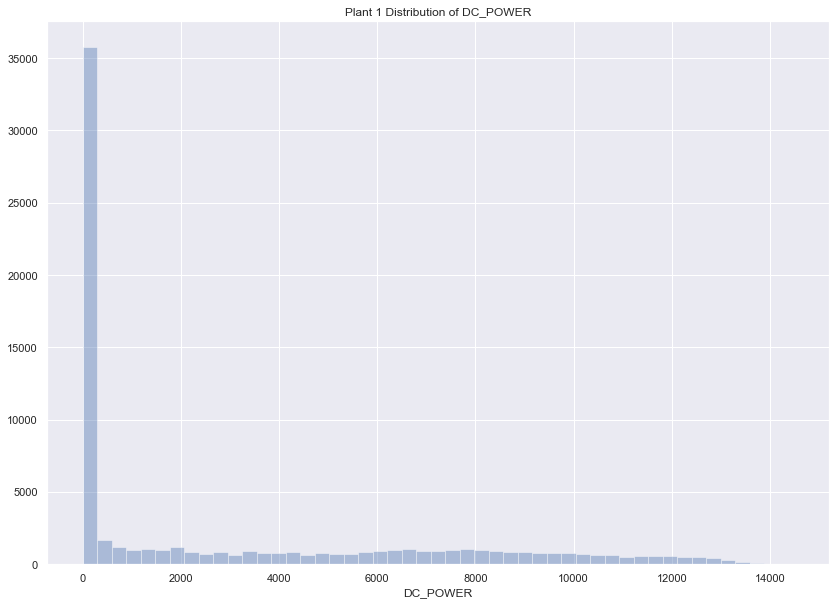

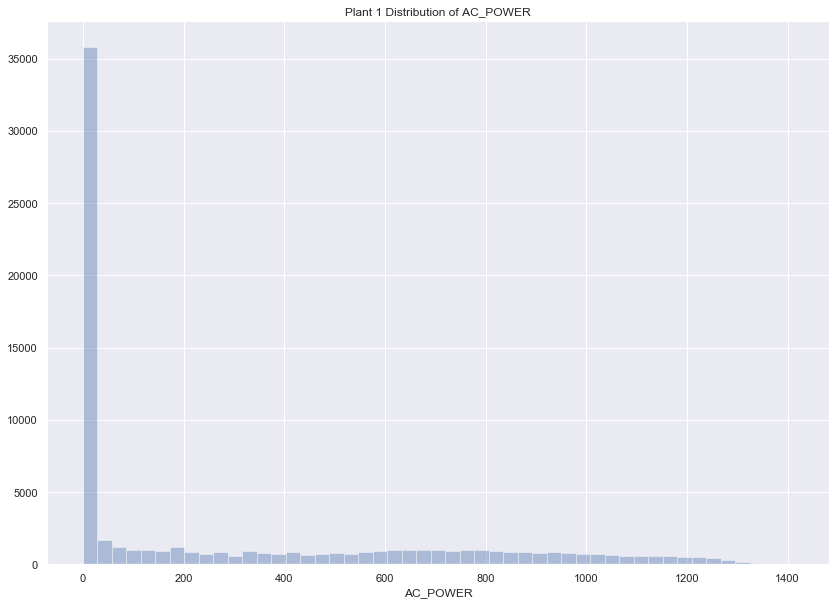

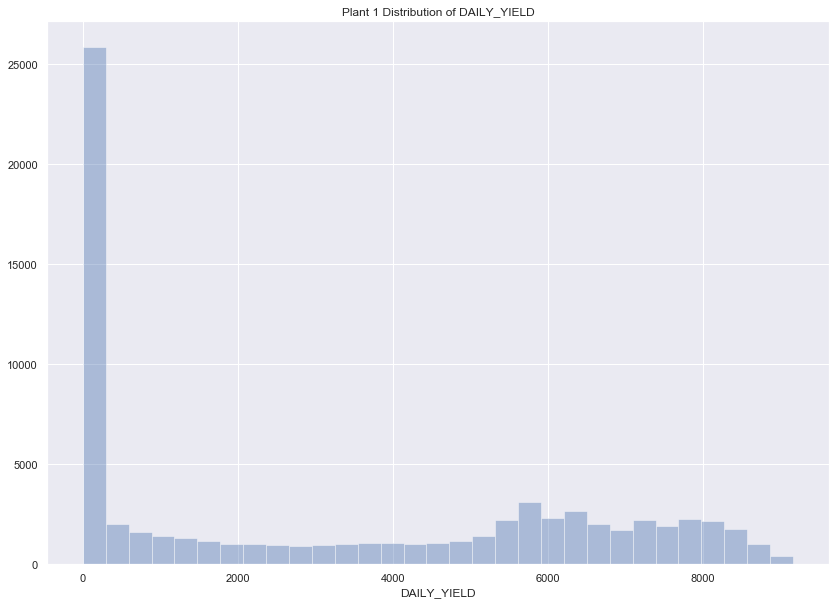

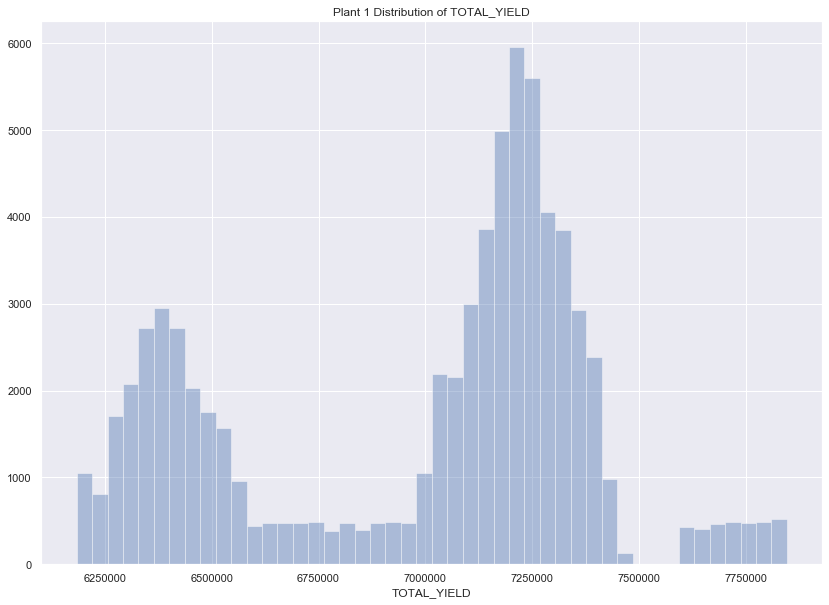

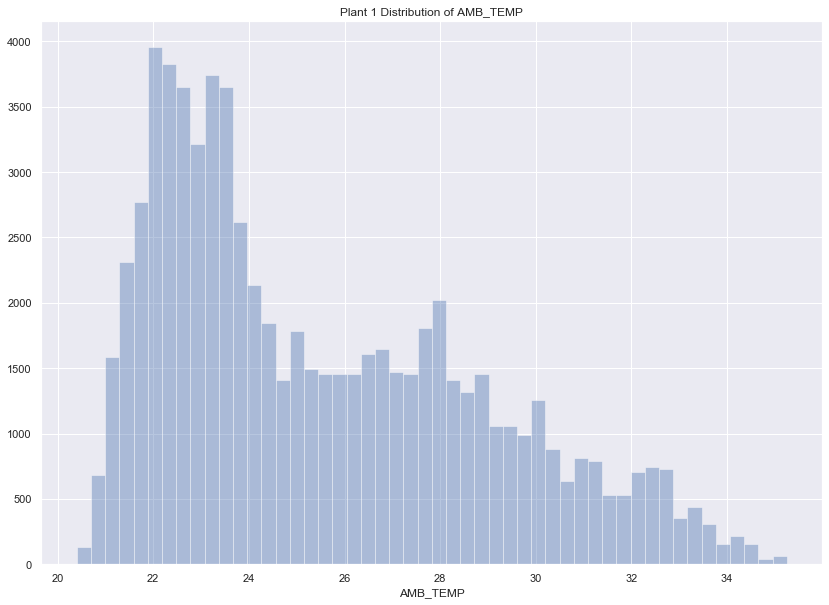

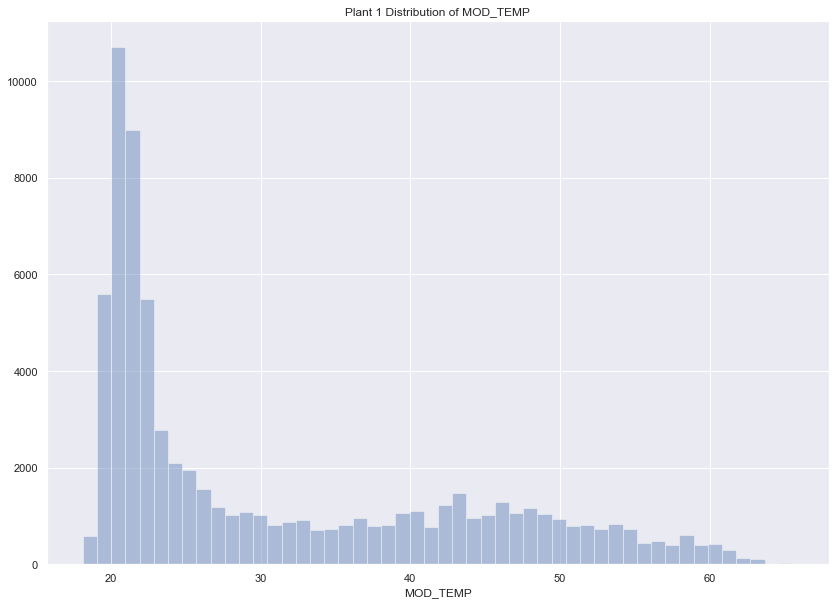

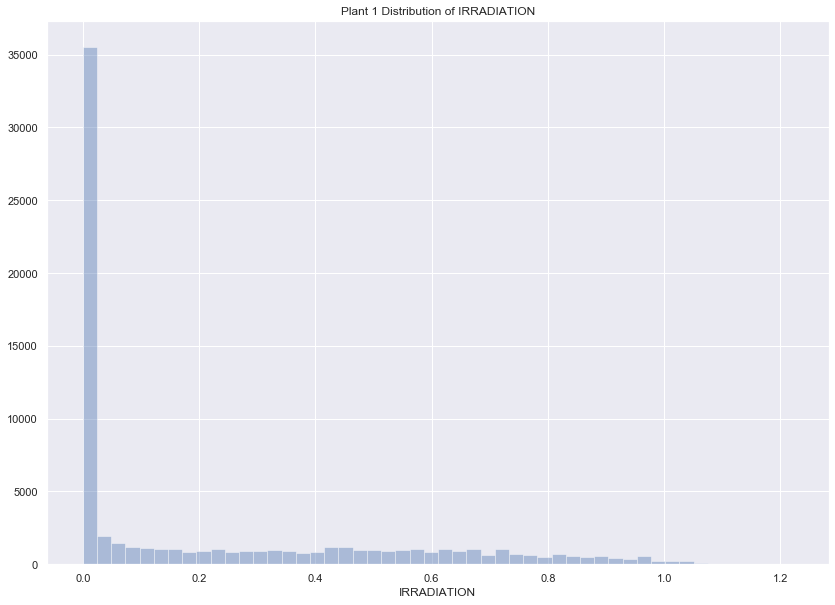

In [35]:
# Visualise Plant 1 Distributions - Whole Series
sns.set(rc = {'figure.figsize':(14, 10)})

for col in df_plant1.columns[df_plant1.dtypes == 'float']:
    sns.distplot(df_plant1[col], kde = False)
    plt.title(f"Plant 1 Distribution of {col}")
    plt.show()

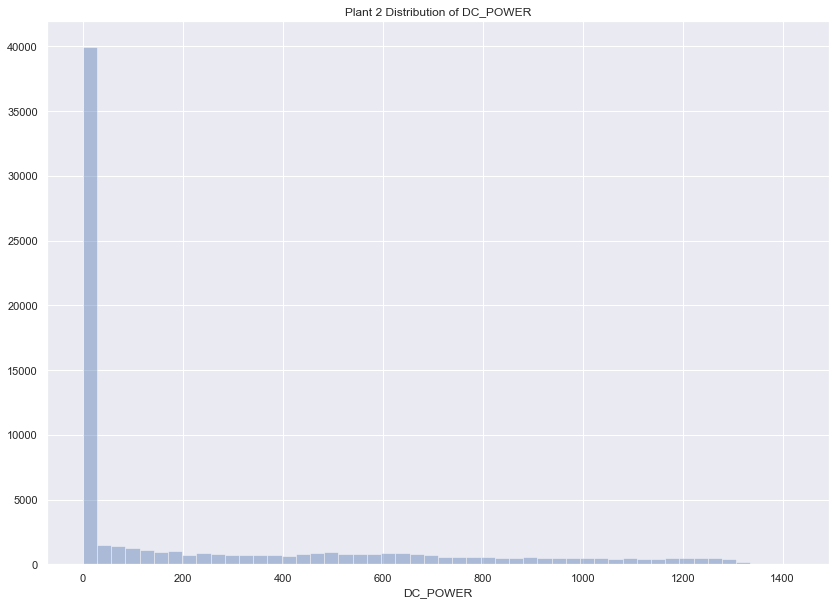

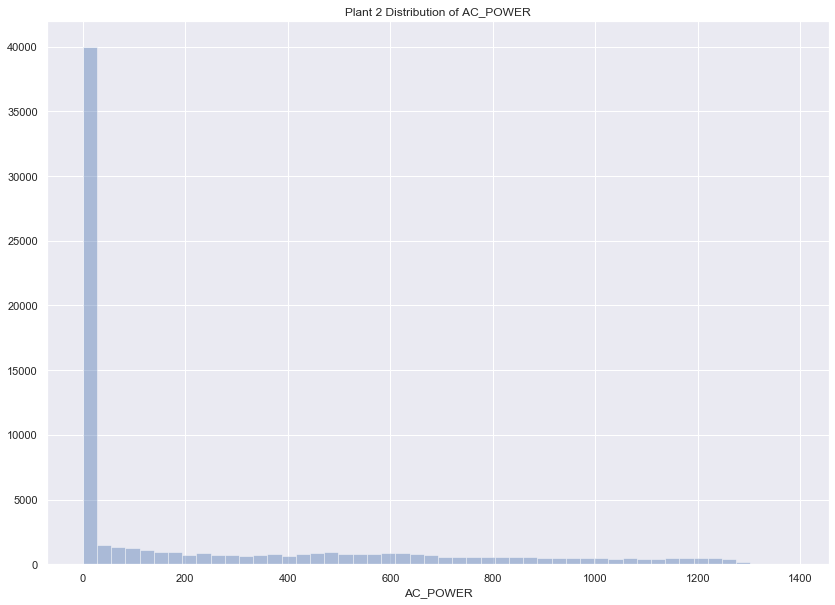

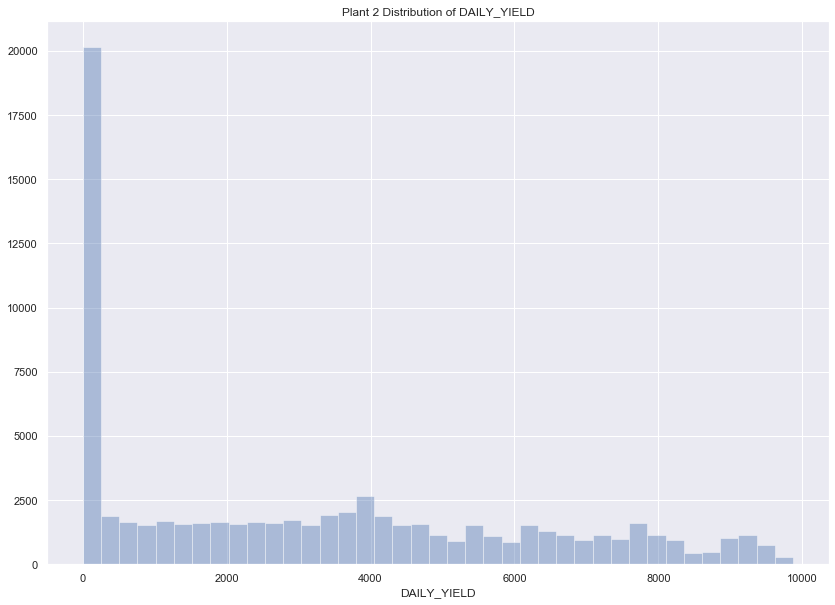

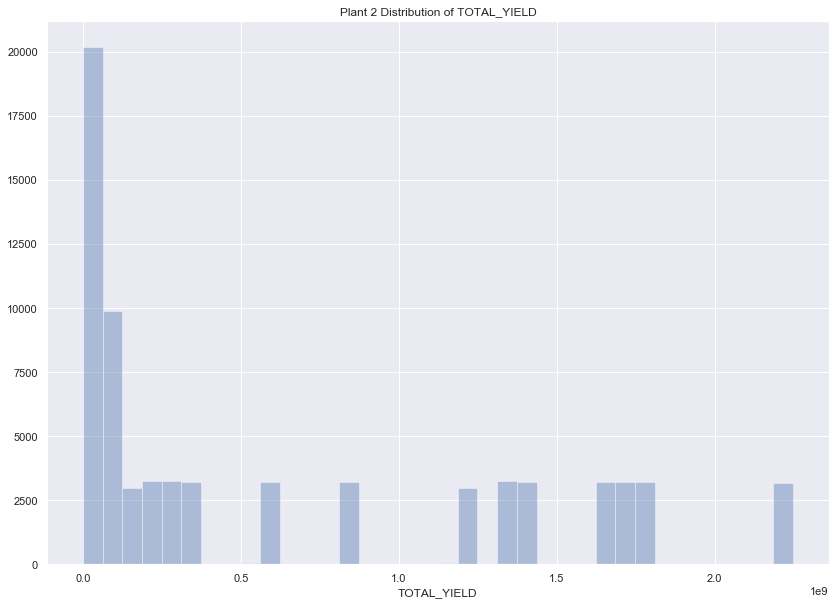

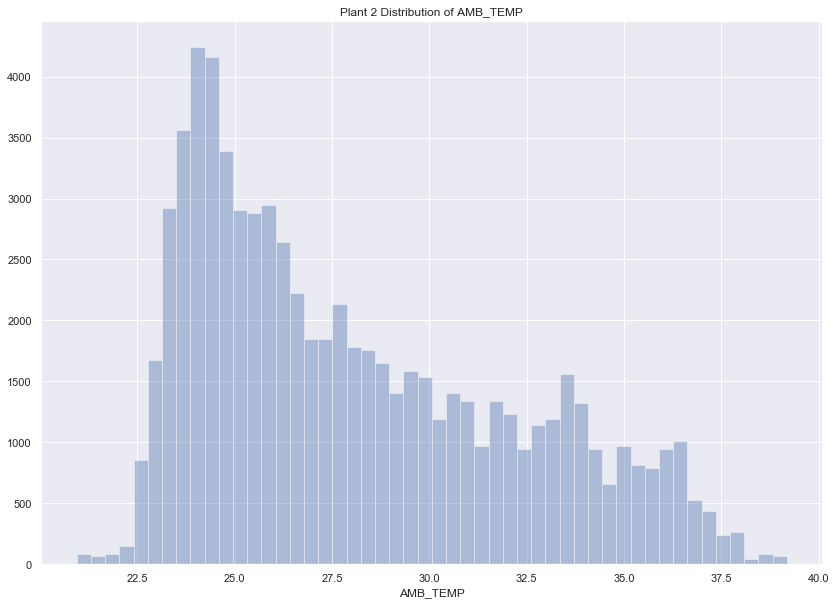

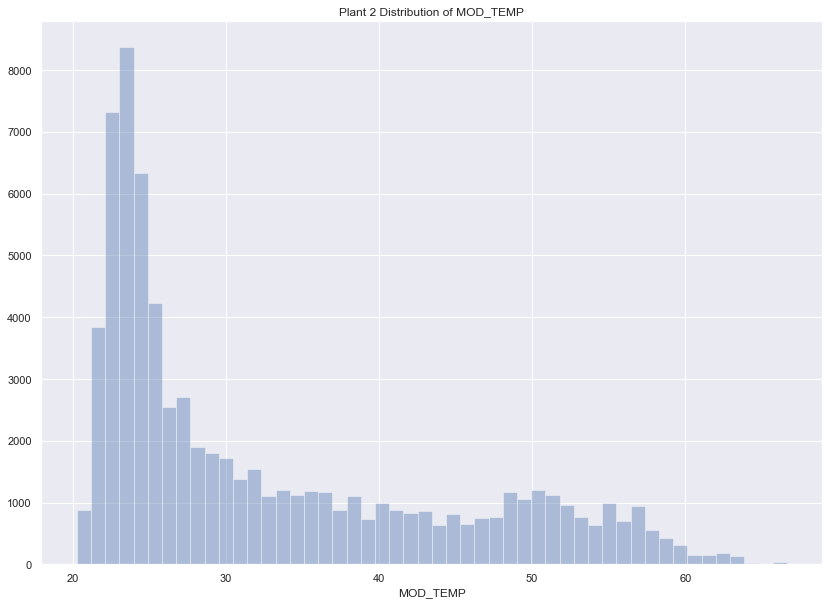

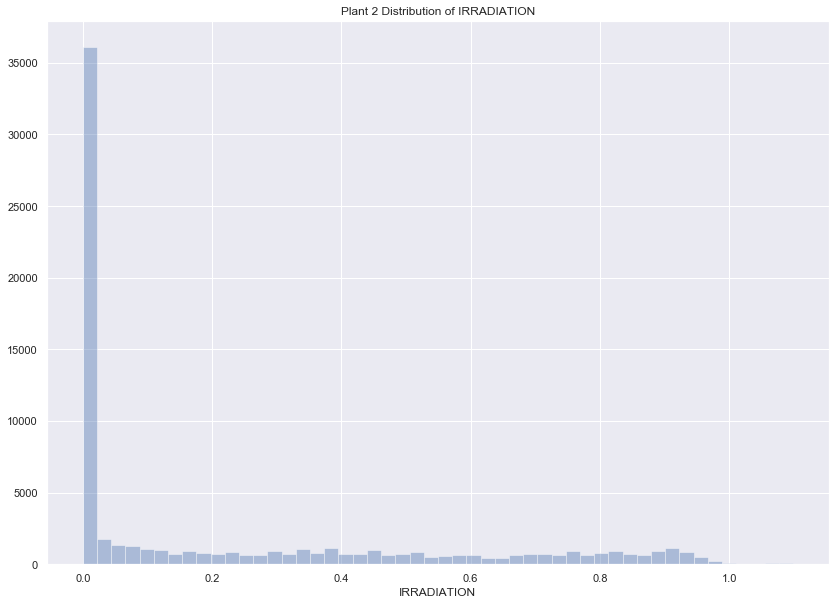

In [36]:
# Visualise Plant 2 Distributions - Whole Series
sns.set(rc = {'figure.figsize':(14, 10)})

for col in df_plant2.columns[df_plant2.dtypes == 'float']:
    sns.distplot(df_plant2[col], kde = False)
    plt.title(f"Plant 2 Distribution of {col}")
    plt.show()

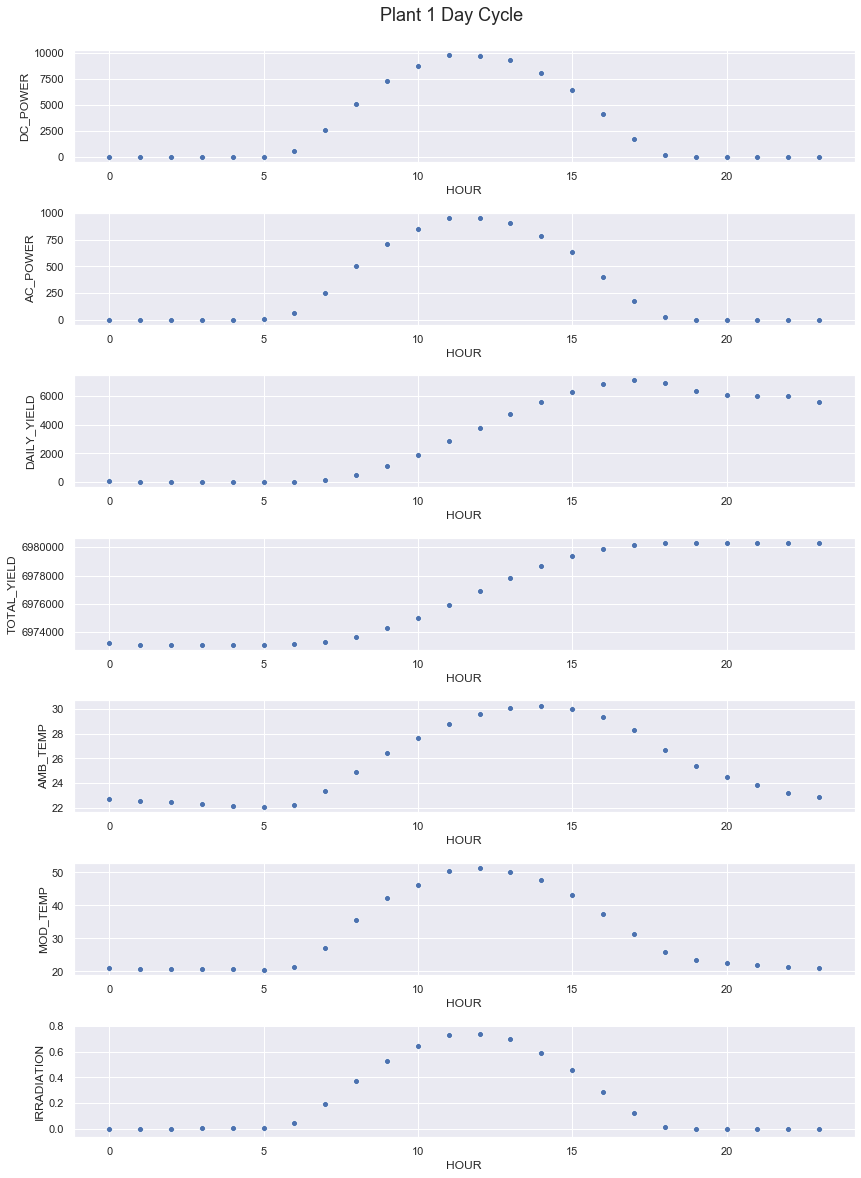

In [37]:
# Visualise Variable Relationships (Plant 1)
n_rows = len(df_plant1.columns[df_plant1.dtypes =='float'])
fig, axes = plt.subplots(nrows = n_rows, ncols = 1, figsize = (14, 20))

# Populate each subplot
ax_no = 0
for col in df_plant1.columns[df_plant1.dtypes == 'float']:

    # Determine hourly mean values for dataset of interest
    profile_group = df_plant1.groupby(['HOUR']).mean().reset_index()

    # Plot data
    sns.scatterplot(data = profile_group, x = 'HOUR', y = col, ax = axes[ax_no])
    
    # Set for next axis in subplot
    ax_no += 1

# Set title, axes
plt.suptitle("Plant 1 Day Cycle", fontsize = 18, y = 0.91)

plt.subplots_adjust(hspace = 0.45, wspace = 0.25)

plt.show()

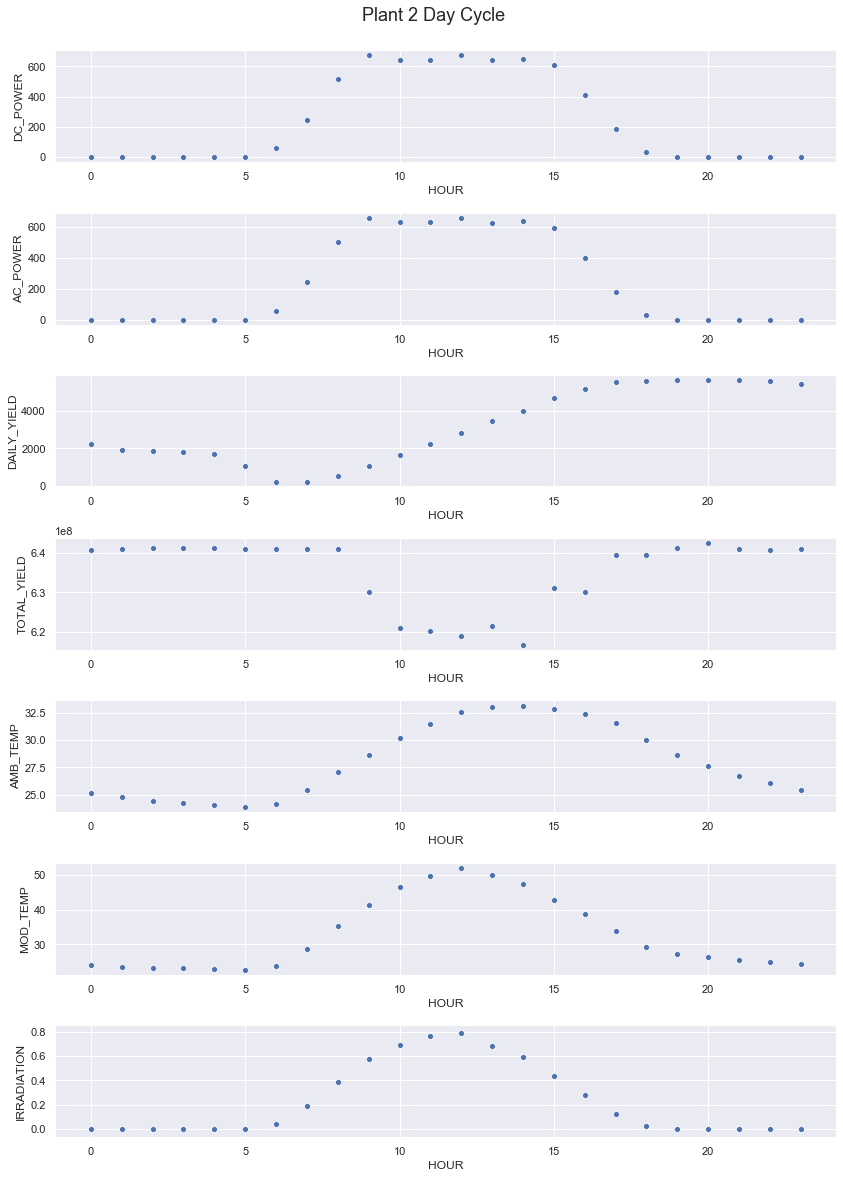

In [38]:
# Visualise Variable Relationships (Plant 2)
n_rows = len(df_plant2.columns[df_plant2.dtypes =='float'])
fig, axes = plt.subplots(nrows = n_rows, ncols = 1, figsize = (14, 20))

# Populate each subplot
ax_no = 0
for col in df_plant2.columns[df_plant2.dtypes == 'float']:

    # Determine hourly mean values for dataset of interest
    profile_group = df_plant2.groupby(['HOUR']).mean().reset_index()

    # Plot data
    sns.scatterplot(data = profile_group, x = 'HOUR', y = col, ax = axes[ax_no])
    
    # Set for next axis in subplot
    ax_no += 1

# Set title, axes
plt.suptitle("Plant 2 Day Cycle", fontsize = 18, y = 0.91)

plt.subplots_adjust(hspace = 0.45, wspace = 0.25)

plt.show()

In [39]:
# Fix unreasonable daily yield
for df in [df_plant1, df_plant2]:
    df.loc[(df['DAILY_YIELD'] > 0) & (df['HOUR'] < 5), 'DAILY_YIELD'] = 0

In [40]:
# Remove unreliable total yield
for df in [df_plant1, df_plant2]:
    df.drop(columns = 'TOTAL_YIELD', inplace = True)

In [41]:
# Rescale plant DC Output (Equivalent to Plant 2)
df_plant1['DC_POWER'] /= 10

In [42]:
# Save munged dataframes

df_plant1.name = "df_plant1_munged"
df_plant2.name = "df_plant2_munged"

datasets = [df_plant1, df_plant2]

# Save modified datasets
for dataset in datasets:
    load_data.pickle_data(dataset, dataset.name)

Pickling dataframe ...
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant1_munged.pkl
Pickling dataframe ...
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant2_munged.pkl


In [43]:
# Reload dataframes
df_plant1 = load_data.load_pickled_data("df_plant1_munged.pkl")
df_plant2 = load_data.load_pickled_data("df_plant2_munged.pkl")

Loading pickled dataframe started ...
Loading pickled dataframe complete ...
Loading pickled dataframe started ...
Loading pickled dataframe complete ...


# Feature Engineering
Additional features created around hour and day -level (AC power, DC power, Daily Yield)

In [44]:
# Rescale plant 1 dc power
df_plant1['DC_POWER'] /= 10
df_plant1['DC_POWER'].describe()

count    71808.000000
mean        30.655695
std         40.075341
min          0.000000
25%          0.000000
50%          3.085898
75%         62.102009
max        144.711250
Name: DC_POWER, dtype: float64

In [45]:
# Fix erroneous daily yield
for df in [df_plant1, df_plant2]:
    df.loc[(df['DAILY_YIELD'] > 0) & (df['HOUR'] < 6), 'DAILY_YIELD'] = 0

In [46]:
# Add hour-level & day-level features
for df in [df_plant1, df_plant2]:

    # Sort values by datetime
    df.sort_values((['SOURCE_KEY', 'DATE_TIME']), ascending = True, inplace = True)

    # Calculate hour-level features
    df['AVG_HR_DC'] = df.groupby(['SOURCE_KEY', 'HOUR'])['DC_POWER'].transform(func = np.mean)
    df['AVG_HR_AC'] = df.groupby(['SOURCE_KEY', 'HOUR'])['AC_POWER'].transform(func = np.mean)
    df['AVG_HR_YIELD'] = df.groupby(['SOURCE_KEY', 'HOUR'])['DAILY_YIELD'].transform(func = np.mean)

    # Calculate day-level features
    df['AVG_DAILY_DC'] = df.groupby(['SOURCE_KEY', 'DATE'])['DC_POWER'].transform(func = np.mean)
    df['AVG_DAILY_AC'] = df.groupby(['SOURCE_KEY', 'DATE'])['AC_POWER'].transform(func = np.mean)
    df['AVG_DAILY_YIELD'] = df.groupby(['SOURCE_KEY', 'DATE'])['DAILY_YIELD'].transform(func = np.mean)

In [47]:
# Add DC / Irradiation feature
for df in [df_plant1, df_plant2]:

    # Calculate ratio for all rows
    df['DC-IRR_RATIO'] = df['DC_POWER'] / df['IRRADIATION']

    # Adjust for rows with no irradiation
    df.loc[(df['HOUR'] < 7), 'DC-IRR_RATIO'] = 0
    df.loc[(df['HOUR'] > 17), 'DC-IRR_RATIO'] = 0

count    71808.000000
mean       550.727673
std        691.333024
min          0.000000
25%          0.000000
50%          0.000000
75%       1365.556022
max       3674.774247
Name: DC-IRR_RATIO, dtype: float64

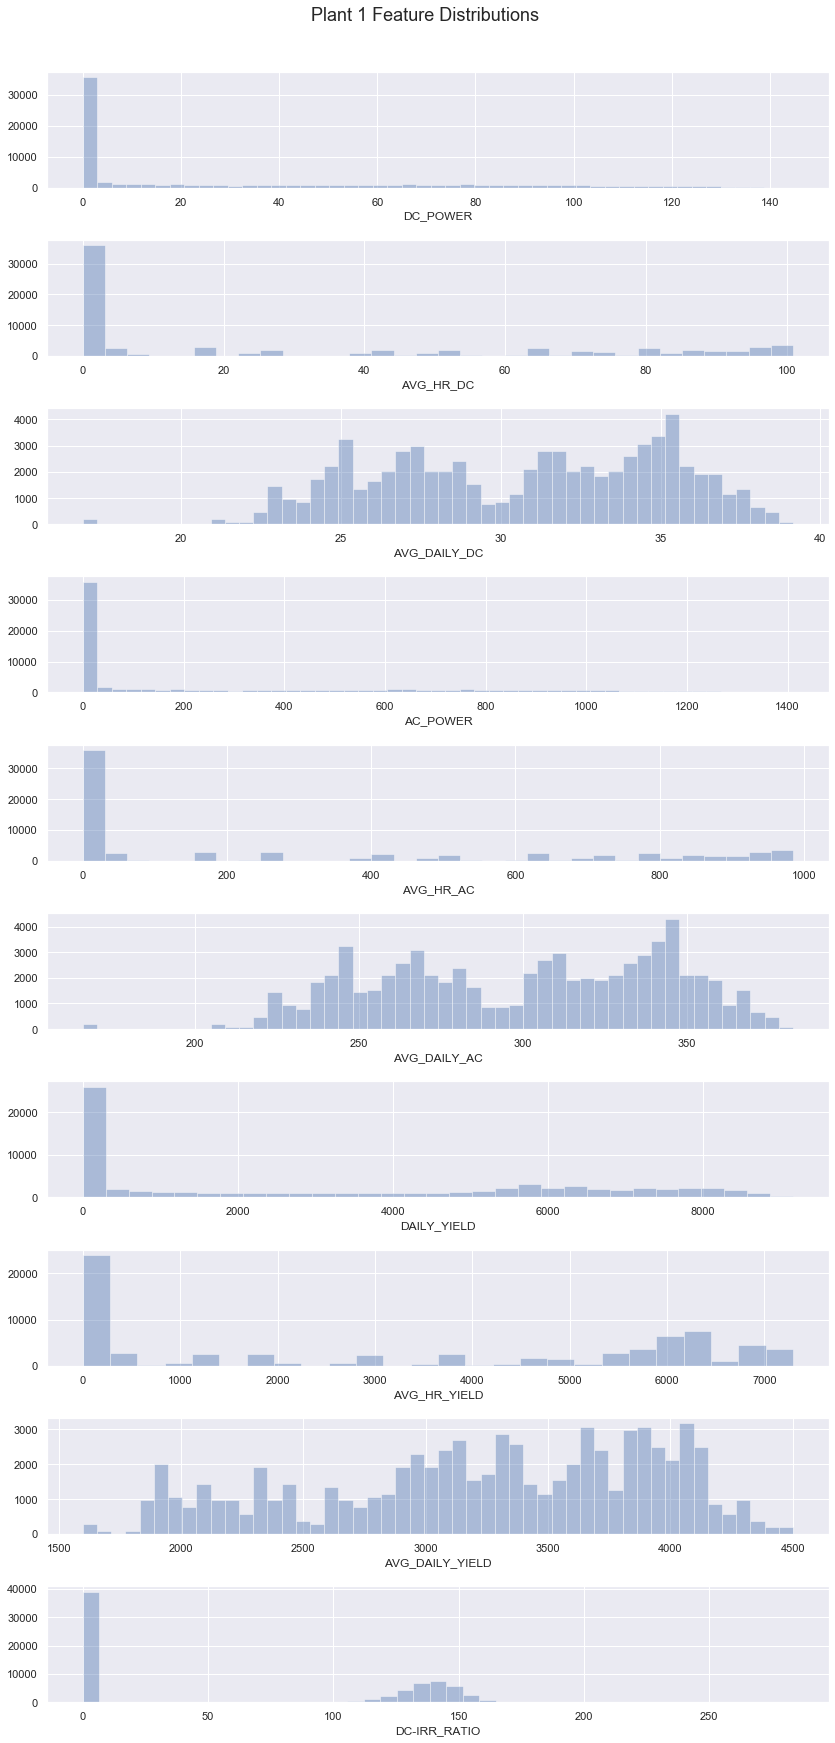

In [49]:
# Visualise new features in plant 1

# Create subset of dataframe
df_subset_plant1 = df_plant1[['DC_POWER', 'AVG_HR_DC', 'AVG_DAILY_DC', 'AC_POWER', 'AVG_HR_AC', 'AVG_DAILY_AC', 'DAILY_YIELD', 'AVG_HR_YIELD', 'AVG_DAILY_YIELD', 'DC-IRR_RATIO' ]]

# Visualise Variable Relationships (Plant 1)
n_rows = len(df_subset_plant1.columns[df_subset_plant1.dtypes =='float'])
fig, axes = plt.subplots(nrows = n_rows, ncols = 1, figsize = (14, 30))

# Populate each subplot
ax_no = 0
for col in df_subset_plant1.columns[df_subset_plant1.dtypes == 'float']:

    # Plot data
    sns.distplot(df_subset_plant1[col], kde = False, ax = axes[ax_no])
    
    # Set for next axis in subplot
    ax_no += 1

# Set title, axes
plt.suptitle("Plant 1 Feature Distributions", fontsize = 18, y = 0.91)

plt.subplots_adjust(hspace = 0.45, wspace = 0.25)

plt.show()

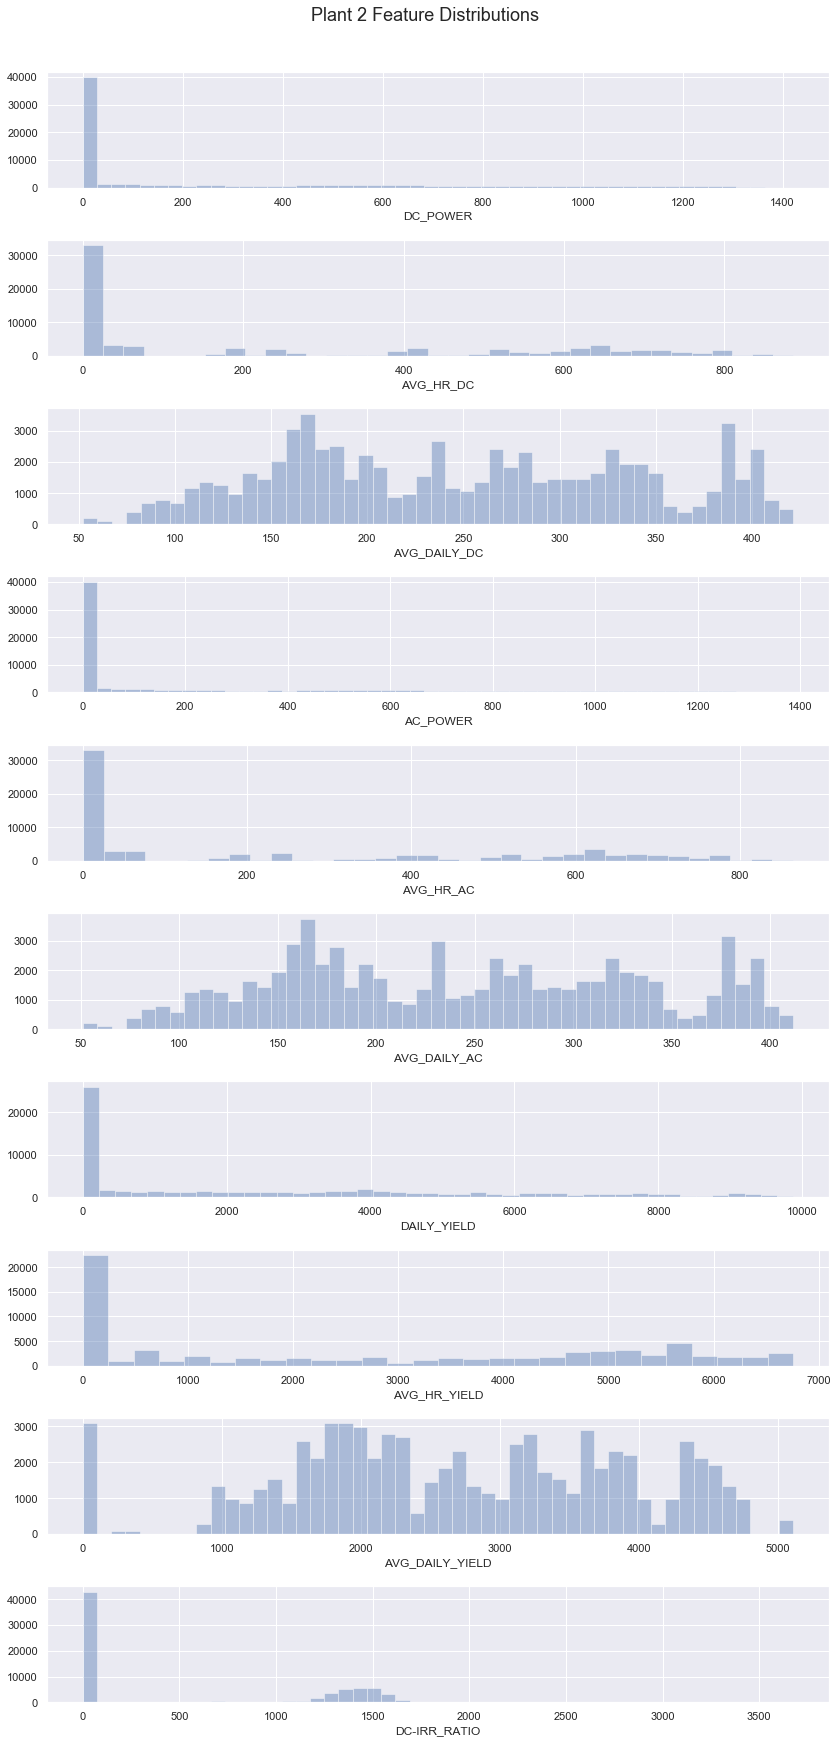

In [50]:
# Visualise new features in plant 2

# Create subset of dataframe
df_subset_plant2 = df_plant2[['DC_POWER', 'AVG_HR_DC', 'AVG_DAILY_DC', 'AC_POWER', 'AVG_HR_AC', 'AVG_DAILY_AC', 'DAILY_YIELD', 'AVG_HR_YIELD', 'AVG_DAILY_YIELD', 'DC-IRR_RATIO' ]]

n_rows = len(df_subset_plant2.columns[df_subset_plant1.dtypes =='float'])
fig, axes = plt.subplots(nrows = n_rows, ncols = 1, figsize = (14, 30))

# Populate each subplot
ax_no = 0
for col in df_subset_plant2.columns[df_subset_plant2.dtypes == 'float']:

    # Plot data
    sns.distplot(df_subset_plant2[col], kde = False, ax = axes[ax_no])
    
    # Set for next axis in subplot
    ax_no += 1

# Set title, axes
plt.suptitle("Plant 2 Feature Distributions", fontsize = 18, y = 0.91)

plt.subplots_adjust(hspace = 0.45, wspace = 0.25)

plt.show()

A large proportion of the distributions are at zero (i.e the sun is not shining).

It would make sense to remove this data as it is not useful for forecasting or anomaly detection.

AC Power is a duplicate of DC Power, so no need to keep.

In [54]:
# Drop AC Power

# Specify features to remove
features_to_remove = {     
 'AC_POWER', 'AVG_HR_AC', 'AVG_DAILY_AC'
}

# Remove features
for df in [df_plant1, df_plant2]:
    for feature in features_to_remove:
        df.drop(columns = feature, inplace = True)

In [56]:
# Save & reload revised datasets
df_plant1.name = "df_plant1_feat_eng"
df_plant2.name = "df_plant2_feat_eng"

datasets = [df_plant1, df_plant2]

# Save modified datasets
for dataset in datasets:
    load_data.pickle_data(dataset, dataset.name)

    # Reload dataframes
df_plant1 = load_data.load_pickled_data("df_plant1_feat_eng.pkl")
df_plant2 = load_data.load_pickled_data("df_plant2_feat_eng.pkl")

Pickling dataframe ...
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant1_feat_eng.pkl
Pickling dataframe ...
Pickled dataframe to: C:/Developer/solar-power-generation-project/Data/Interim/df_plant2_feat_eng.pkl
Loading pickled dataframe started ...
Loading pickled dataframe complete ...
Loading pickled dataframe started ...
Loading pickled dataframe complete ...


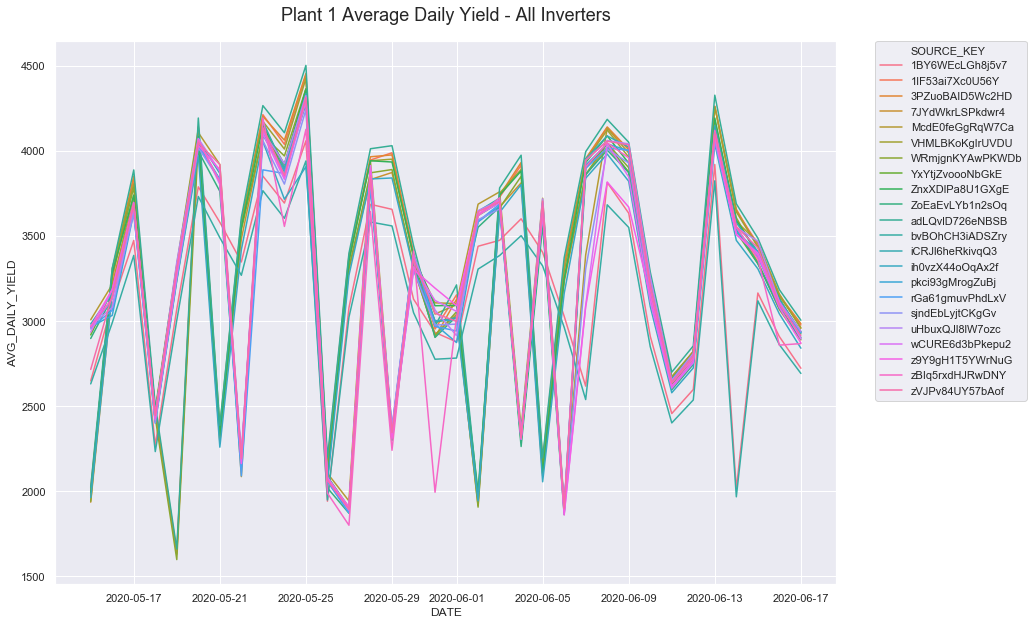

In [63]:
# Visualising Daily Yield v. Time, Plant 1

# Create key-date groupings
plant1_grouped = df_plant1.groupby(['SOURCE_KEY', 'DATE']).mean().reset_index()

# Create plot
sns.lineplot(data = plant1_grouped, x = 'DATE', y = 'AVG_DAILY_YIELD', hue = 'SOURCE_KEY')

# Style figure
plt.title('Plant 1 Average Daily Yield - All Inverters', fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

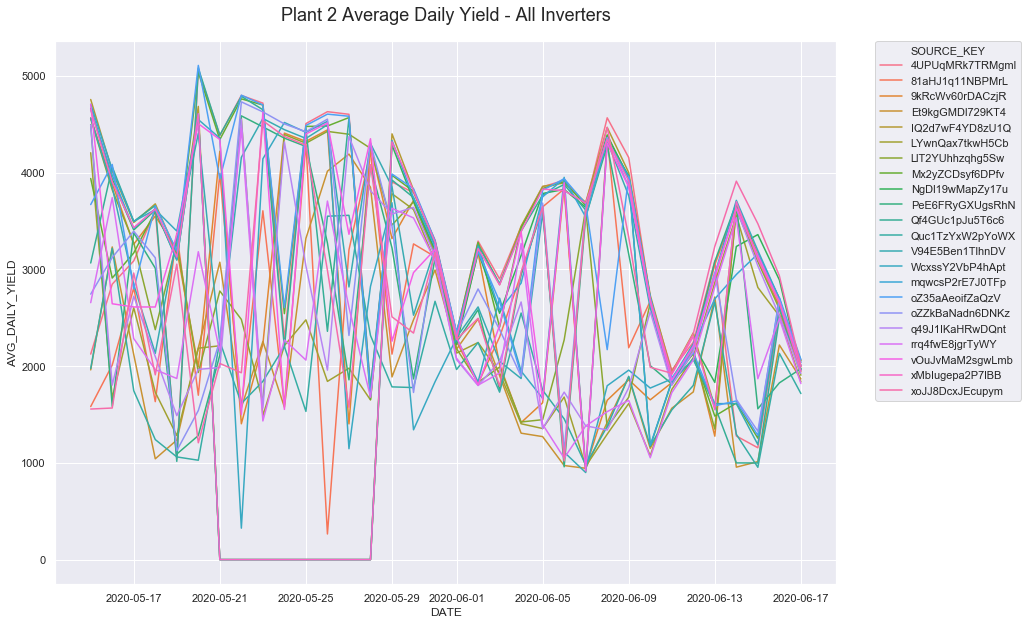

In [64]:
# Visualising Daily Yield v. Time, Plant 2

# Create key-date groupings
plant2_grouped = df_plant2.groupby(['SOURCE_KEY', 'DATE']).mean().reset_index()

# Create plot
sns.lineplot(data = plant2_grouped, x = 'DATE', y = 'AVG_DAILY_YIELD', hue = 'SOURCE_KEY')

# Style figure
plt.title('Plant 2 Average Daily Yield - All Inverters', fontsize = figures_helper.TITLE_FONTSIZE, pad = 20)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

In [52]:
# Investigate Linear Correlations - Plant 1
corr_matrix_plant1 = combi_df_plant1.corr()

# Drop NaN Columns
corr_matrix_plant1.drop(index = ['PLANT_ID'], columns = ['PLANT_ID'], inplace = True)

print(corr_matrix_plant1)

NameError: name 'combi_df_plant1' is not defined

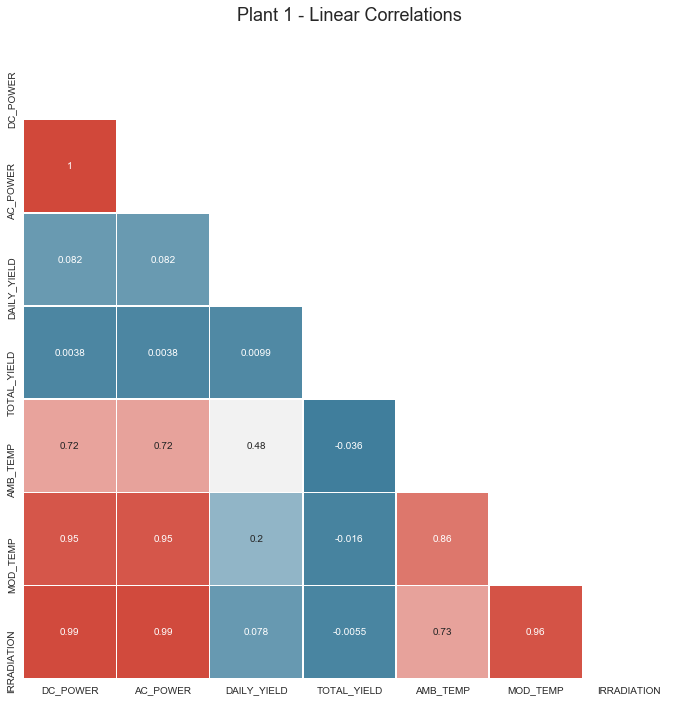

In [42]:
# Visualise Linear Correlations - Plant 1

plt.figure(figsize = (14, 12))

# Create symmetry mask
mask = np.zeros_like(corr_matrix_plant1)
mask[np.triu_indices_from(mask)] = True

# Create diverging colour map
cmap = sns.diverging_palette(230, 15, n = 12, as_cmap = True)

# Adjust y-axis styling
cbar_kws = {"orientation": "horizontal"}

# Create heatmap figure
lin_corr_plant1 = sns.heatmap(corr_matrix_plant1, mask = mask, cmap = cmap, square = True, annot = True, linewidths = 0.5, cbar_kws = cbar_kws, cbar = False)

# Set title, other parameters
plt.title("Plant 1 - Linear Correlations", fontsize = 18)

plt.show()

In [43]:
# Investigate Linear Correlations - Plant 2
corr_matrix_plant2 = combi_df_plant2.corr()

# Drop NaN Columns
corr_matrix_plant2.drop(index = ['PLANT_ID'], columns = ['PLANT_ID'], inplace = True)

print(corr_matrix_plant2)

             DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMB_TEMP  MOD_TEMP  \
DC_POWER     1.000000  0.999996     0.082284     0.003815  0.616934  0.864676   
AC_POWER     0.999996  1.000000     0.082234     0.003804  0.617120  0.864870   
DAILY_YIELD  0.082284  0.082234     1.000000     0.009867  0.495832  0.231739   
TOTAL_YIELD  0.003815  0.003804     0.009867     1.000000 -0.052692 -0.031008   
AMB_TEMP     0.616934  0.617120     0.495832    -0.052692  1.000000  0.848395   
MOD_TEMP     0.864676  0.864870     0.231739    -0.031008  0.848395  1.000000   
IRRADIATION  0.900346  0.900562     0.059958    -0.018641  0.670565  0.947004   

             IRRADIATION  
DC_POWER        0.900346  
AC_POWER        0.900562  
DAILY_YIELD     0.059958  
TOTAL_YIELD    -0.018641  
AMB_TEMP        0.670565  
MOD_TEMP        0.947004  
IRRADIATION     1.000000  


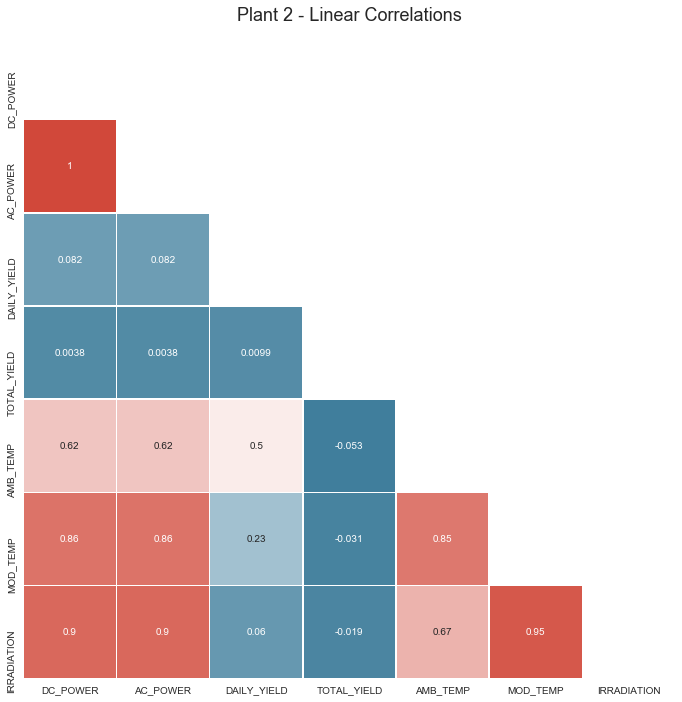

In [44]:
# Visualise Linear Correlations - Plant 2

plt.figure(figsize = (14, 12))

# Create symmetry mask
mask = np.zeros_like(corr_matrix_plant2)
mask[np.triu_indices_from(mask)] = True

# Create diverging colour map
cmap = sns.diverging_palette(230, 15, n = 12, as_cmap = True)

# Adjust y-axis styling
cbar_kws = {"orientation": "horizontal"}

# Create heatmap figure
lin_corr_plant2 = sns.heatmap(corr_matrix_plant2, mask = mask, cmap = cmap, square = True, annot = True, linewidths = 0.5, cbar_kws = cbar_kws, cbar = False)

# Set title, other parameters
plt.title("Plant 2 - Linear Correlations", fontsize = 18)

plt.show()